# ML Week 3 - K-Means Clustering
##### Today we will build our very first Machine Learning algorithm from scratch!
##### We will be building an unsupervised algorithm called "K-means". It is useful for identifying patterns in messy tabular data by "clustering" rows that seem to have similar properties. As it is unsupervised, we don't have to worry about labelling data beforehand.

### Datset
Today we will build a very "toy" version of K-means, and therefore use a super simplistic dataset. This is the "Iris" Dataset - a dataset of different types of Iris flowers containing measurements of the pedals.

Next week we will apply K-means to a real architecture dataset

## Importing Common Packages
##### Always a good place to start

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

## We can read data in directly from a URL like this:

In [18]:
# download iris data and read it into a dataframe
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

In [82]:
# The last column ("Species") contains the name of the flower for each row. This is kinda the answer.
# Let's remove it for now and see if we can identify the different species ourselves. Using it would kinda be cheating

X = df[["SepalLengthCm", "SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df['Species']

# Cleaner way:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

In [20]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

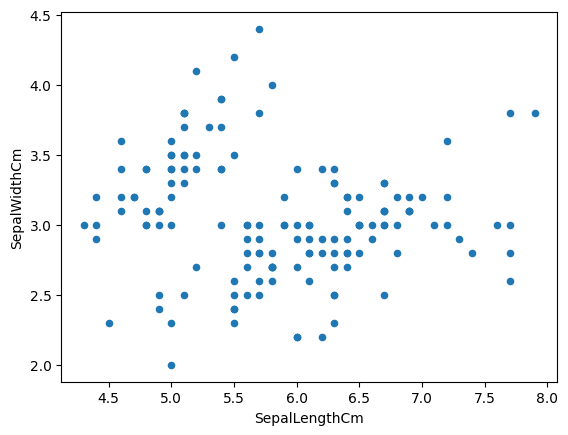

In [21]:
X.plot.scatter(x = 'SepalLengthCm', y='SepalWidthCm')

In [83]:
# Depending on ML application it is sometimes better to use a numpy array vs a DataFrame.
# Here we now only have numeric data, and we don't really care about the meanings of the columns beyond this point
# So this is a good time to use a numpy array - it's cleaner and we can manipulate it more easily.
X = X.to_numpy()

In [24]:
# Let's chceck the shape of our data.
# We see we have 150 points, each with 4 "features". These are like points in some big "4D" space
X.shape

(150, 4)

## Randomly select K points
##### Here we will set K=3. Later we will study how to choose the best K value

In [25]:
# We need to randomly select 3 points to set as cluster centres
# This command randomly shuffles the numbers 0 to 149
randomized_X = np.random.permutation(X.shape[0])

In [26]:
randomized_X

array([107,  96,   1,  41, 112,  98,  29, 109,  86, 118,  39, 101,  44,
        82, 103, 146,  36,  99, 116,  13,  18,  34,  31,  84, 119,  81,
        51, 132, 130, 120, 137,  42,  68,  33,  78,  88, 138,  74,  95,
       148,  48, 105,  63,  26,  35,  40,  22,   3,  91,  73,  62,  76,
        71,   4,  70,  23,  10,  28, 114,  52,  32, 106, 131,  56, 147,
        45,  37,   2, 125, 123,  50, 136, 113,  49,  92,  38, 134, 143,
       121,  30,  60,  65, 104,  97,  54,  57,   5,  46,   6,  80,  17,
        11,  85,  16,  43,  19,  24, 149, 126,  87,  69,  20, 117,  64,
         7,  47,  61,  72,  58, 127,  77, 110,  59,  12, 102, 111, 145,
        79, 124,  89,  67,  21, 100,  15, 140,  14,  75,  93, 135,  90,
       108, 122, 142, 133,   9,  25, 141,  94, 129,   0, 128,  83,   8,
        55, 144,  53,  27,  66, 139, 115], dtype=int32)

In [27]:
# We can now pick 3 of these numbers (the first 3 - it doesn't matter where we pick them from as they have been shuffled)
centroid_idx = randomized_X[:3]
# Then, from the X array, we take the 3 points that correspond to the 3 random numbers we picked
centroids = X[centroid_idx]
# What we have now done is randomly chosen 3 points from X (ie. 3 flowers)

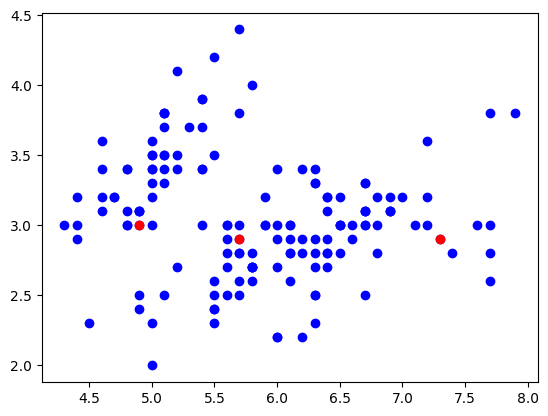

In [ ]:
# We can see the 3 random points we have selected
plt.scatter(x = X[:,0], y = X[:,1], c='blue')
plt.scatter(x = centroids[:,0], y = centroids[:,1], c='red')

## For each point, we now check which centroid it's closest to
##### We can do this using the numpy linalg.norm function

In [39]:

points = np.array(())
for i in range(len(X)):
    distance_1 = np.linalg.norm((X[i] - centroids[0]))
    distance_2 = np.linalg.norm((X[i] - centroids[1]))
    distance_3 = np.linalg.norm((X[i] - centroids[2]))
    cluster = np.argmin([distance_1, distance_2, distance_3])
    points = np.append(points, cluster)

# A more efficient way of doing this:
#for i in range(len(X)):
#    cluster = np.argmin(np.linalg.norm((X[i] - centroids), axis=-1))
#    points = np.append(points, cluster)

In [40]:
points

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

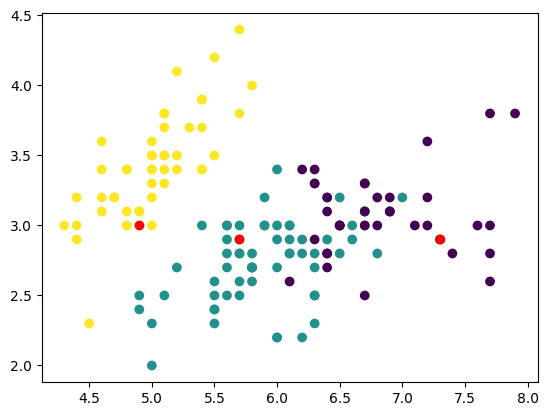

In [45]:
plt.scatter(x = X[:,0], y = X[:,1], c=points)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c='red')

## Define new centroids as the centres (means) of each cluster
##### That's why it's called k-means! O_O

In [46]:
# This is actually quite easy to do
# X[points==i] takes only the rows of X which are attributed to cluster "i". Then we just average these with ".mean"
for i in range(3):
    centroids[i] = X[points==i].mean(axis=0)

In [47]:
# And now we have new centroids!
centroids

array([[6.86285714, 3.07142857, 5.80571429, 2.1       ],
       [5.93846154, 2.76461538, 4.42153846, 1.44769231],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

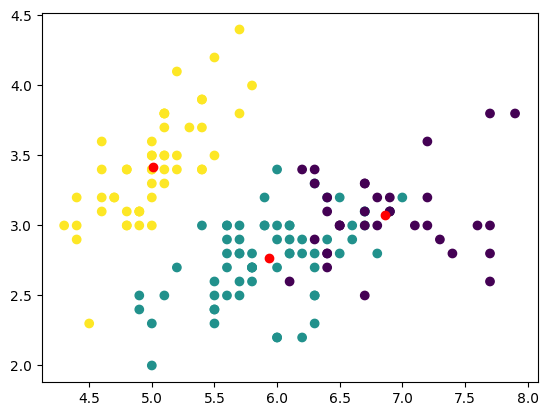

In [ ]:
# We can see the centroids moving to the centre of the clusters:

plt.scatter(x = X[:,0], y = X[:,1], c=points)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c='red')

## Taking all of this and putting it into a K-means function

In [84]:
def kmeans(X:np.array, K:int=3, iterations:int=100) -> np.array:
    for _ in range(iterations):
        randomized_X = np.random.permutation(X.shape[0])
        centroid_idx = randomized_X[:K]
        centroids = X[centroid_idx]
        points = np.array(())
        for i in range(len(X)):
            cluster = np.argmin(np.linalg.norm((X[i] - centroids), axis=-1))
            points = np.append(points, cluster)
        for i in range(K):
            centroids[i] = X[points==i].mean(axis=0)
    return np.column_stack((X,points))

In [114]:
pred = kmeans(X,3,100)

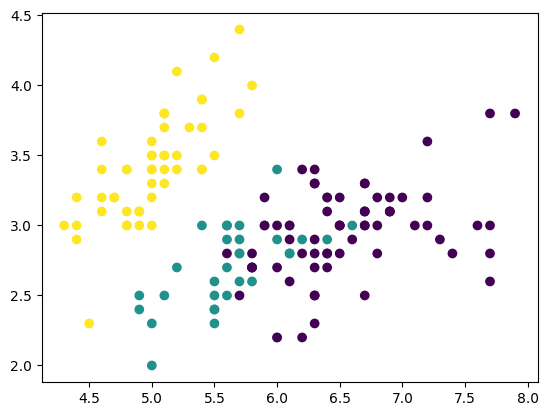

In [125]:
plt.scatter(x = pred[:,0], y = X[:,1], c=pred[:,-1])

In [120]:
for i in range(len(y)):
    print(y[i], ", ", pred[:,-1][i])

Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-setosa ,  2.0
Iris-versicolor ,  0.0
Iris-versicolor ,  1.0
Iris

y